# 'Natural Experiments in Management Research'

__Author__: masked

__Synopsis__: this Jupyter notebook reproduces the set of exhibits
              reported in the 2023 JoM review issue proposal
              # __!! report number !!__

__Updated__: June 24, 2021

## Load functions

In [6]:
# utilities
import os
import glob
from pprint import pprint
from IPython.core.display import display, HTML
# standard stuff
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.cluster import AgglomerativeClustering
# a user defined lollipop chart
from companionCode.visualization import lollipop, line_chart, lda_viz, plot_dendrogram, plot_reduced_data
# to parse BibTeX stuff
from companionCode.handleBibs import df_from_bib
# data transformation tasks
from companionCode.nlp.dataTransformation import spacy_pipeline, extract_ngrams, tp_corpus
# topic modeling
from companionCode.nlp.topicModeling import search_k, tm_estimation, get_vectors, data_reduction
# silence warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Sampling

In [2]:
# TODO: export separate BibTeX files from the individual folders

## Sample descriptives

### Load BibTeX data

In [3]:
in_f = "manuscript/references/sampled_studies.bib"
df = df_from_bib(in_f)

### Distribution of studies over time

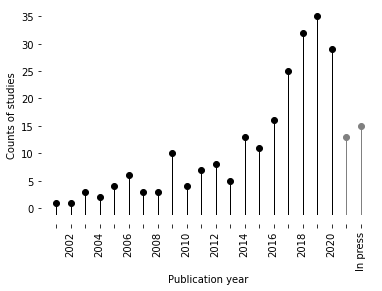

In [4]:
lollipop(
    df_=df,
    x_label="Publication year",
    y_label="Counts of studies", 
    grouping_var="year"
)

### Distribution of studies over time and journals

In [5]:
# cross-tab
tw = pd.crosstab(df['journal'], df['year'])
# write file & display
out_f = 'manuscript/exhibits/articles_over_time_and_journals.html'
tw.to_html(out_f)
display(HTML(out_f))

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
journal,,,,,,,,,,,,,,,,,,,,,,
Academy of Management Journal,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,2,0,0,0,0
Administrative Science Quarterly,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0,1,0,1,0
Entrepreneurship: Theory and Practice,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,1,0,0
Journal of Business Ethics,0,0,0,1,0,0,0,0,0,0,1,0,0,0,2,2,2,5,2,3,1,0
Journal of Business Venturing,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,3,0
Journal of Management,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
Journal of Management Studies,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,1,0,0,0
Leadership Quarterly,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Management Science,1,1,1,0,0,2,1,2,3,1,2,4,1,4,3,10,9,12,13,14,2,11


## Topic modeling of abstracts

### Read abstracts

In [7]:
in_files = glob.glob(os.path.join('/home/simone/.data', '*.csv'))
df = pd.concat(pd.read_csv(f) for f in in_files)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27370 entries, 0 to 1382
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Authors                        27370 non-null  object 
 1   Author(s) ID                   27370 non-null  object 
 2   Title                          27370 non-null  object 
 3   Year                           27370 non-null  int64  
 4   Source title                   27370 non-null  object 
 5   Volume                         26546 non-null  float64
 6   Issue                          26522 non-null  object 
 7   Art. No.                       636 non-null    object 
 8   Page start                     25972 non-null  object 
 9   Page end                       25723 non-null  object 
 10  Page count                     8 non-null      float64
 11  Cited by                       25693 non-null  float64
 12  DOI                            27275 non-null  

### Text pre-processing

In [8]:
tkn_docs = spacy_pipeline(
    model_='en_core_web_lg',
    raw_corpus=df.loc[:, 'Abstract'].to_list()
)

### Extract ngrams

In [9]:
tkn_docs = extract_ngrams(tkn_docs=tkn_docs)

### Create corpus to pass to Tomotopy for topic modeling

In [10]:
corpus = tp_corpus(tkn_docs)

### Search for an adequate number of topics

In [11]:
cs = search_k(min_=1, max_=50, delta_=1, corpus_=corpus)

Iteration: 0000, LL per word: -7.887
Iteration: 0020, LL per word: -7.887
Iteration: 0040, LL per word: -7.887
Iteration: 0060, LL per word: -7.887
Iteration: 0080, LL per word: -7.887
Iteration: 0100, LL per word: -7.887
Iteration: 0120, LL per word: -7.887
Iteration: 0140, LL per word: -7.887
Iteration: 0160, LL per word: -7.887
Iteration: 0180, LL per word: -7.887
Iteration: 0200, LL per word: -7.887
Iteration: 0220, LL per word: -7.887
Iteration: 0240, LL per word: -7.887
Iteration: 0260, LL per word: -7.887
Iteration: 0280, LL per word: -7.887
Iteration: 0300, LL per word: -7.887
Iteration: 0320, LL per word: -7.887
Iteration: 0340, LL per word: -7.887
Iteration: 0360, LL per word: -7.887
Iteration: 0380, LL per word: -7.887
Iteration: 0400, LL per word: -7.887
Iteration: 0420, LL per word: -7.887
Iteration: 0440, LL per word: -7.887
Iteration: 0460, LL per word: -7.887
Iteration: 0480, LL per word: -7.887
Iteration: 0500, LL per word: -7.887
Iteration: 0520, LL per word: -7.887
I

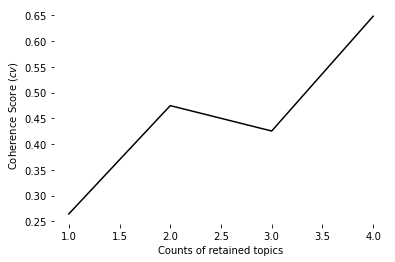

In [11]:
line_chart(
    x_=cs.keys(),
    y_=cs.values(),
    x_label='Counts of retained topics',
    y_label='Coherence Score ($cv$)'
)

### Preview the results of the best model

In [12]:
# estimate model with desired number of topics
lda_fit = tm_estimation(corpus_=corpus, k_=4)

Num docs:1600, Num Vocabs:2175, Total Words:85470
Removed Top words:  firm performance study effect team relationship theory academy_management_journal organizational work organization research find employee high examine result level social influence
Iteration: 0000, LL per word: -8.951
Iteration: 0020, LL per word: -7.544
Iteration: 0040, LL per word: -7.403
Iteration: 0060, LL per word: -7.361
Iteration: 0080, LL per word: -7.342
Iteration: 0100, LL per word: -7.322
Iteration: 0120, LL per word: -7.314
Iteration: 0140, LL per word: -7.307
Iteration: 0160, LL per word: -7.299
Iteration: 0180, LL per word: -7.299
Iteration: 0200, LL per word: -7.296
Iteration: 0220, LL per word: -7.29
Iteration: 0240, LL per word: -7.287
Iteration: 0260, LL per word: -7.285
Iteration: 0280, LL per word: -7.281
Iteration: 0300, LL per word: -7.281
Iteration: 0320, LL per word: -7.281
Iteration: 0340, LL per word: -7.277
Iteration: 0360, LL per word: -7.282
Iteration: 0380, LL per word: -7.285
Iteration:

### Get vectors with topic modeling estimates

In [13]:
topic_2_term, topic_2_doc, doc_lengths, vocab, term_frequency = get_vectors(lda_fit)

### Visualize rendered topics

In [14]:
lda_viz(
    topic_2_term=topic_2_term,
    topic_2_doc=topic_2_doc,
    doc_lengths=doc_lengths,
    vocab_=vocab,
    term_frequency=term_frequency
)

## Fold-in unseen documents

### Load NE studies' abstracts

In [15]:
sm = df_from_bib('review/sampled_studies.bib')

### Pre-process unseen abstracts

In [16]:
tkn_docs = spacy_pipeline(
    model_='en_core_web_sm',
    raw_corpus=sm.loc[:, 'abstract'].to_list()
)

### Extract ngrams

In [17]:
tkn_docs = extract_ngrams(tkn_docs=tkn_docs)

### Infer topic structure

In [18]:
for item in tkn_docs:
    unseen_doc = lda_fit.make_doc(tkn_docs[0])
    topic_dist, ll = lda_fit.infer(unseen_doc)
    topic_2_doc = np.vstack([topic_2_doc, [topic_dist]])

## Post-processing of Topic Modeling estimates

### Identify the number of clusters to group abstracts

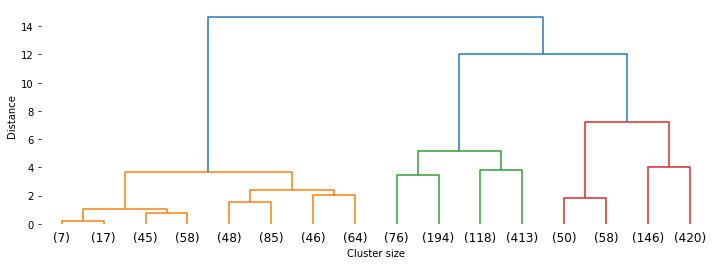

In [19]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(
    distance_threshold=0,
    n_clusters=None
    )
model = model.fit(topic_2_doc)
# plot dendrogram
plot_dendrogram(
    model,
    x_label='Cluster size',
    y_label='Distance',
    truncate_mode='level',
    p=3
    )

### Carrying out clustering

In [20]:
reduced_data, kmeans, x_min, x_max, y_min, y_max, xx, yy, Z = data_reduction(topic_2_doc, n_clusters=5)

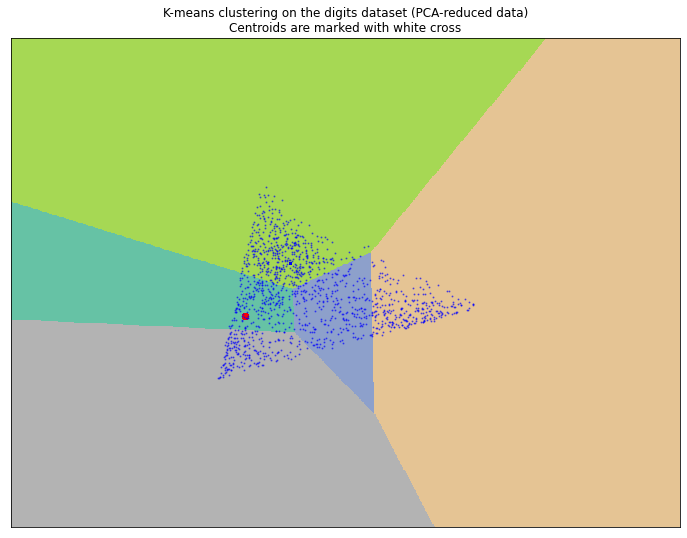

In [21]:
plot_reduced_data(
    reduced_data=reduced_data,
    kmeans_=kmeans,
    x_min=x_min,
    x_max=x_max,
    y_min=y_min,
    y_max=y_max,
    xx_=xx,
    yy_=yy,
    Z_=Z,
    unseen_=245
    )

In [22]:
len(reduced_data)

1845